In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_auc_score, confusion_matrix, classification_report, plot_roc_curve

import pickle
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [3]:
df=pd.read_csv("dataset_small.csv")

In [4]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.0,58645.0,58645.0,58645.000000,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.0,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,0.004877,0.003274,0.004212,0.006855,0.000767,0.002865,0.162503,1.068429,44.959297,1.799540,0.133294,0.000290,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440992,18.073016,0.003427,0.003530,0.022338,-0.033814,-0.210947,1.590383,-0.298525,-0.287049,-0.293409,-0.291704,-0.296070,-0.297331,-0.293733,-0.297451,-0.296905,-0.292932,-0.298525,-0.296547,-0.219200,16.923932,-0.045750,-0.211084,-0.260466,-0.298525,-0.298525,-0.296035,-0.298082,-0.296377,-0.296956,-0.297877,-0.298082,-0.297672,-0.297366,-0.296752,-0.298525,-0.298525,-0.242305,4.659067,-0.714451,-0.816506,-0.791781,-0.83

In [5]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

Text(0.5, 1.0, 'Frequency of Both labels ')

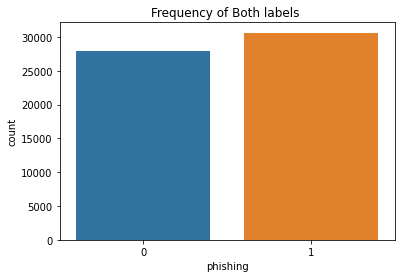

In [6]:
sns.countplot(df.phishing)
plt.title('Frequency of Both labels ')

In [7]:
# Data Preprocessing (dealing with '-1' only as there are no null values)

In [8]:
print("No of duplicate columns: ",df.duplicated(keep='first').sum())
#dropping duplicate rows
df.drop_duplicates(inplace=True)

No of duplicate columns:  1240


In [9]:
single_val_cols=[]
print('#####Columns with single unique value######')
for i in df.columns:
    if df[i].nunique()==1:
        print(f"{i} column has values {df[i].unique()[0]}")
        single_val_cols.append(i)
        
#These columns can be dropped 
df.drop(single_val_cols,axis=1,inplace =True)

#####Columns with single unique value######
qty_slash_domain column has values 0
qty_questionmark_domain column has values 0
qty_equal_domain column has values 0
qty_and_domain column has values 0
qty_exclamation_domain column has values 0
qty_space_domain column has values 0
qty_tilde_domain column has values 0
qty_comma_domain column has values 0
qty_plus_domain column has values 0
qty_asterisk_domain column has values 0
qty_hashtag_domain column has values 0
qty_dollar_domain column has values 0
qty_percent_domain column has values 0


In [10]:
cols1={} 
for i in df.columns:
    print("- - - - - - - - - - - - ")
    x=df[i].value_counts(normalize=True)
    print(x)
    if df[i].isin([-1]).any():
        cols1[i]=x[-1] 

- - - - - - - - - - - - 
2     0.502326
1     0.220225
3     0.178347
4     0.059385
5     0.017350
6     0.007856
7     0.003745
14    0.002334
8     0.001812
15    0.001498
9     0.001097
10    0.000836
16    0.000766
13    0.000645
12    0.000575
11    0.000557
17    0.000383
18    0.000105
22    0.000052
20    0.000052
24    0.000017
23    0.000017
19    0.000017
Name: qty_dot_url, dtype: float64
- - - - - - - - - - - - 
0     0.766484
1     0.151955
2     0.037662
3     0.015034
4     0.008745
5     0.006080
6     0.003745
7     0.002700
8     0.001916
9     0.001307
10    0.001272
11    0.000923
12    0.000645
13    0.000436
14    0.000226
15    0.000174
17    0.000139
16    0.000087
21    0.000087
18    0.000070
19    0.000052
20    0.000052
31    0.000035
26    0.000035
23    0.000035
25    0.000035
24    0.000017
27    0.000017
35    0.000017
34    0.000017
Name: qty_hyphen_url, dtype: float64
- - - - - - - - - - - - 
0     0.908196
1     0.056842
2     0.017995
3     0.008187

In [11]:
#columns that have '-1'
df.columns[df.isin([-1]).any()]

# '-1' can be considered as a unique category
# -1 can be replaced with NAN and use KNN imputer or MissForest imputer to predict the missing value

Index(['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params

In [12]:
# % of data in each column as '-1'
cols1

{'qty_dot_directory': 0.2877623900357112,
 'qty_hyphen_directory': 0.2877623900357112,
 'qty_underline_directory': 0.2877623900357112,
 'qty_slash_directory': 0.2877623900357112,
 'qty_questionmark_directory': 0.2877623900357112,
 'qty_equal_directory': 0.2877623900357112,
 'qty_at_directory': 0.2877623900357112,
 'qty_and_directory': 0.2877623900357112,
 'qty_exclamation_directory': 0.2877623900357112,
 'qty_space_directory': 0.2877623900357112,
 'qty_tilde_directory': 0.2877623900357112,
 'qty_comma_directory': 0.2877623900357112,
 'qty_plus_directory': 0.2877623900357112,
 'qty_asterisk_directory': 0.2877623900357112,
 'qty_hashtag_directory': 0.2877623900357112,
 'qty_dollar_directory': 0.2877623900357112,
 'qty_percent_directory': 0.2877623900357112,
 'directory_length': 0.2877623900357112,
 'qty_dot_file': 0.2877623900357112,
 'qty_hyphen_file': 0.2877623900357112,
 'qty_underline_file': 0.2877623900357112,
 'qty_slash_file': 0.2877623900357112,
 'qty_questionmark_file': 0.287762

In [13]:
#we can observe that few columns have %87 of data as -1. drop those columns
# We can also observe that the features from the params category have 87% od data as -1. so dropping all the params related features
for i,j in cols1.items():
    if j>=0.8:
        df.drop(i,inplace=True,axis=1)

In [14]:
#replace -1 with NaN
df_imp=df.replace(to_replace = -1,value =np.nan)

<AxesSubplot:>

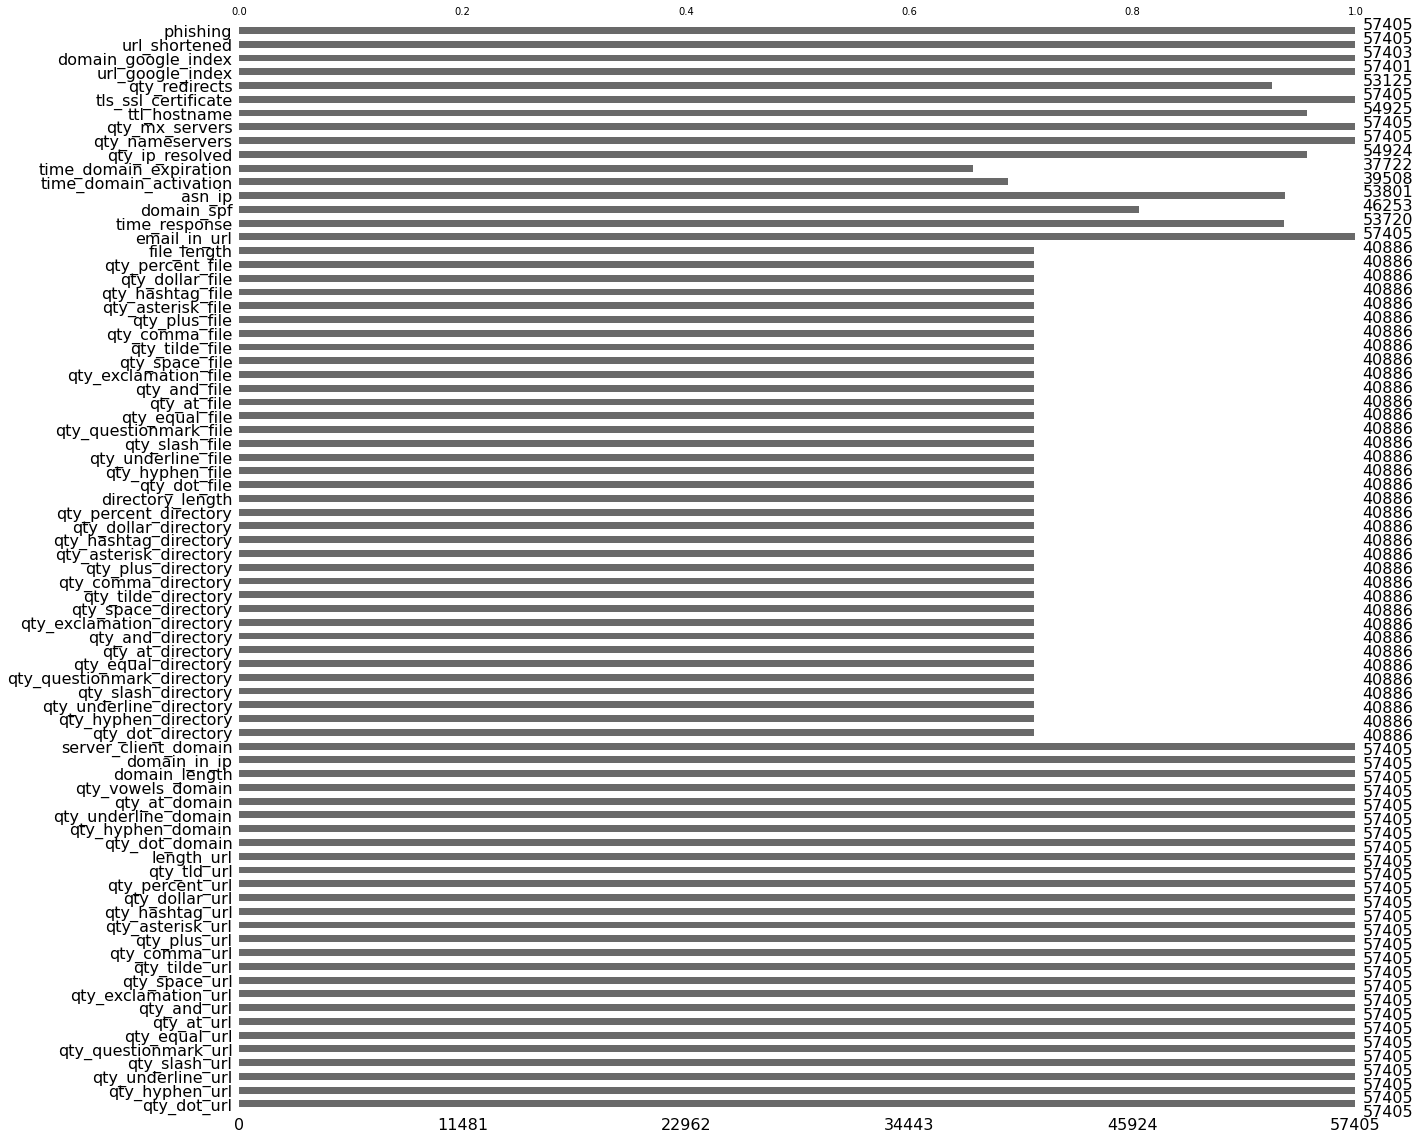

In [15]:
#missing values before knn imputation
msno.bar(df_imp,figsize = (20,20))

In [16]:
#Imputation

import sklearn.neighbors._base
import sys

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#usind KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=3)
df_knn=r.fit_transform(df_imp)
df_knn=pd.DataFrame(df_knn,columns=df_imp.columns)

In [17]:
#Using Rand Forest Imputer
#from missingpy import MissForest
#imputer = MissForest()
#df_forest = imputer.fit_transform(df_imp)
#df_forest=pd.DataFrame(df_forest,columns=df_imp.columns)

In [18]:
single_val_cols=[]
print('#####Columns with single unique value######')
for i in df_knn.columns:
    if df_knn[i].nunique()==1:
        print(f"{i} column has values {df_knn[i].unique()[0]}")
        single_val_cols.append(i)
        
#These columns can be dropped 
df_knn.drop(single_val_cols,axis=1,inplace =True)

#####Columns with single unique value######
qty_questionmark_directory column has values 0.0
qty_hashtag_directory column has values 0.0
qty_slash_file column has values 0.0
qty_questionmark_file column has values 0.0
qty_hashtag_file column has values 0.0
qty_dollar_file column has values 0.0


In [19]:
print(df_knn.domain_spf.value_counts())
df_knn.domain_spf=df_knn.domain_spf.apply(lambda x:np.round(x))
print(df_knn.domain_spf.value_counts())

0.000000    47638
1.000000     9419
0.333333      307
0.666667       41
Name: domain_spf, dtype: int64
0.0    47945
1.0     9460
Name: domain_spf, dtype: int64


In [5]:
numerical_cols=[]
categorical_cols=[]
for i in df_knn.columns:
    if df_knn[i].nunique()<=2:
        categorical_cols.append(i)
    else:
        numerical_cols.append(i)
        

categorical_cols.remove('qty_at_domain')
numerical_cols.append('qty_at_domain')

print("Numerical Columns: \n",numerical_cols) 
print("###############################")
print("categorical_cols: \n",categorical_cols)

Numerical Columns: 
 ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', '

In [25]:
df_knn.to_csv('knn_dataset.csv',index=False)

In [6]:
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory','qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file','qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file','qty_percent_file', 'file_length','phishing']

external_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

In [4]:
df_knn=pd.read_csv('knn_dataset.csv')
df_knn.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_at_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_percent_file,file_length,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,2.0,0.0,0.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334573,0.0,8560.0,4927.0,185.000000,1.0,4.0,2.0,3598.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,4.0,0.0,0.0,0.0,10.0,32.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.326223,0.0,263283.0,8217.0,968.666667,1.0,4.0,1.0,3977.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,0.0,7.0,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.969207,1.0,26496.0,258.0,106.000000,1.0,2.0,1.0,10788.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,2.0,0.0,0.0,0.0,7.0,25.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.495212,1.0,20013.0,2602.0,319.000000,1.0,2.0,1.0,14339.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,46.0,1.0,1.0,0.0,0.0,7.0,19.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.177876,0.0,41828.0,634.0,142.666667,1.0,2.0,1.0,389.0,1.0,1.0,0.0,0.0,0.0,1.0


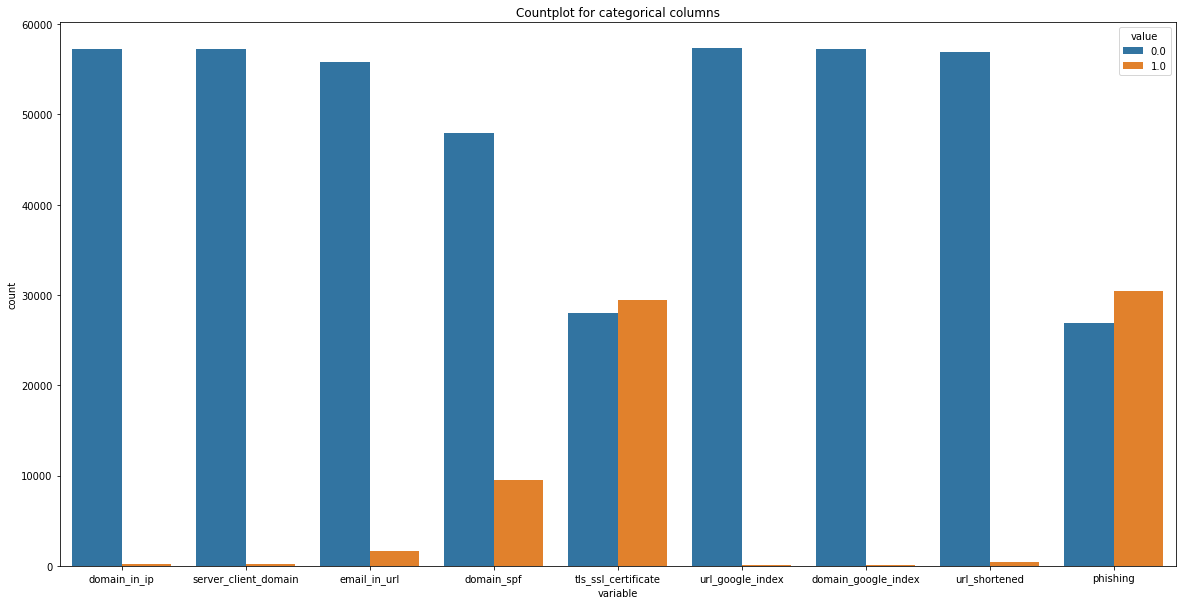

In [23]:
#countplot for categorical values
plt.figure(figsize=(20,10))
df_categorical = df_knn.loc[:,categorical_cols]
sns.countplot(x='variable',hue='value',data= pd.melt(df_categorical))
plt.title('Countplot for categorical columns')
plt.show()

KeyboardInterrupt: 

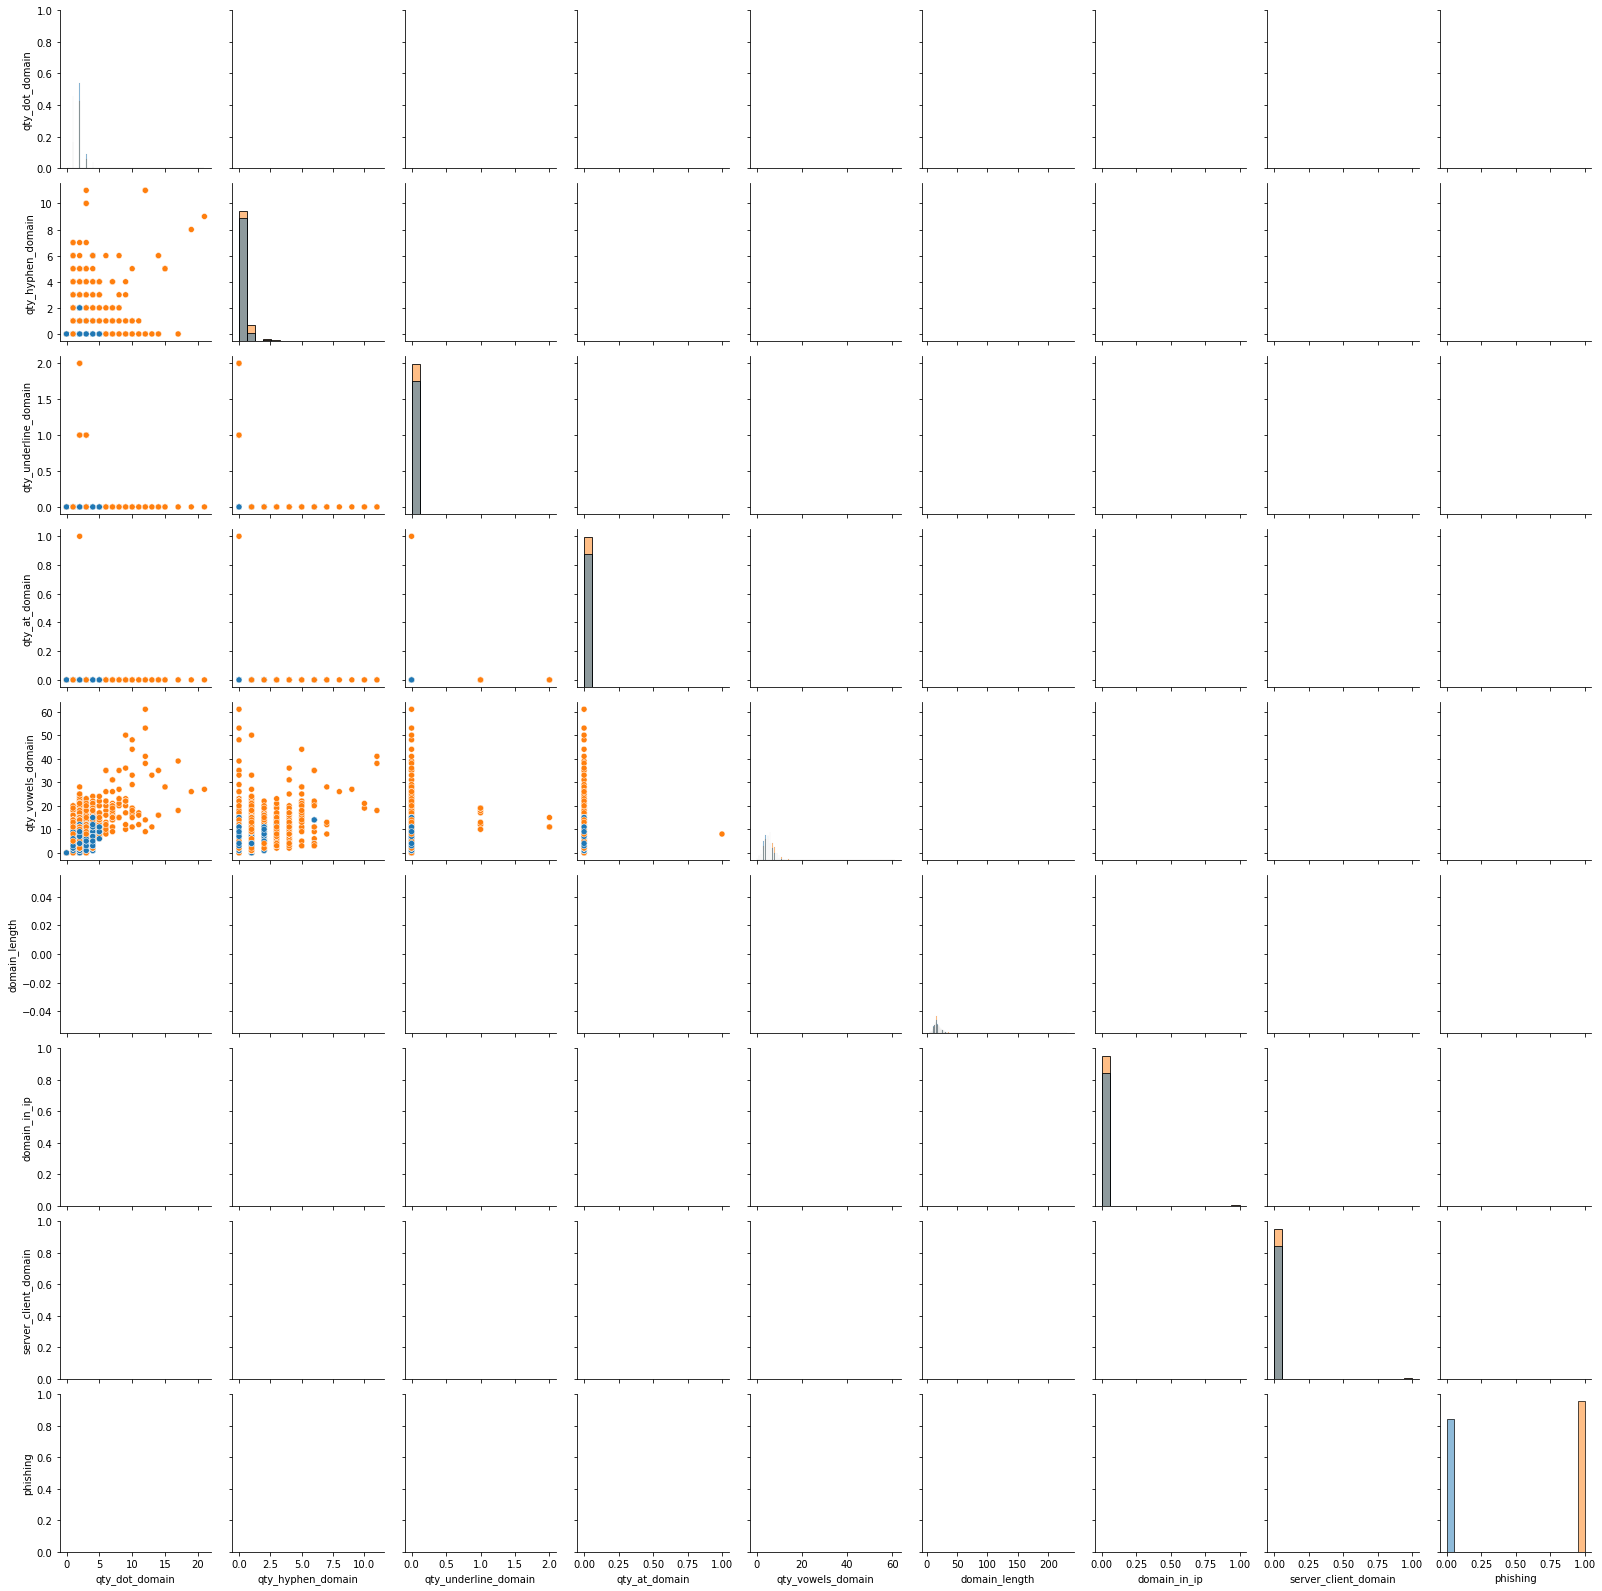

In [24]:
sns.pairplot(df_knn,vars=domain_cols,hue = 'phishing',diag_kind='hist')
plt.show()

In [30]:
sns.pairplot(df_knn,vars=url_cols,hue = 'phishing',diag_kind='hist')
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.pairplot(df_knn,vars=dir_cols,hue = 'phishing',diag_kind='hist')
plt.show()

In [ ]:
sns.pairplot(df_knn,vars=file_cols,hue = 'phishing',diag_kind='hist')
plt.show()

In [ ]:
sns.pairplot(df_knn,vars=external_cols,hue = 'phishing',diag_kind='hist')
plt.show()

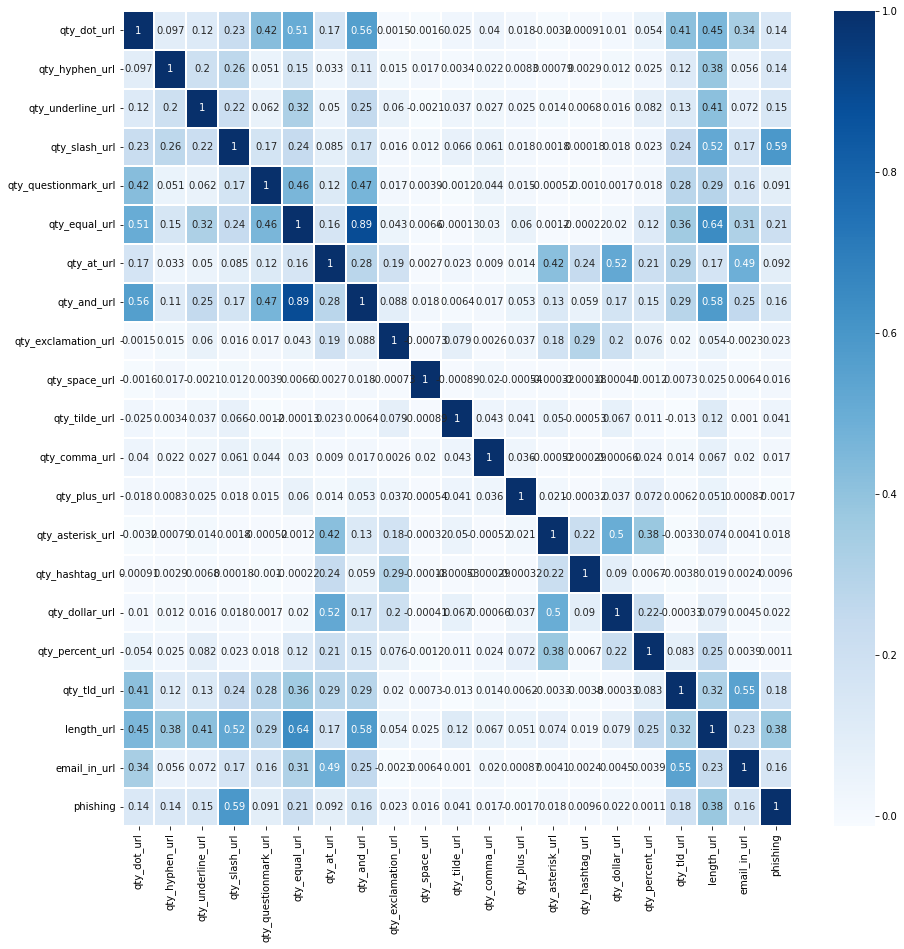

In [31]:
# Heatmap for Dataset attributes based on URL
plt.figure(figsize=(15,15))
sns.heatmap(df_knn[url_cols].corr(),annot=True,linewidths="0.3",cmap="Blues")
plt.show()

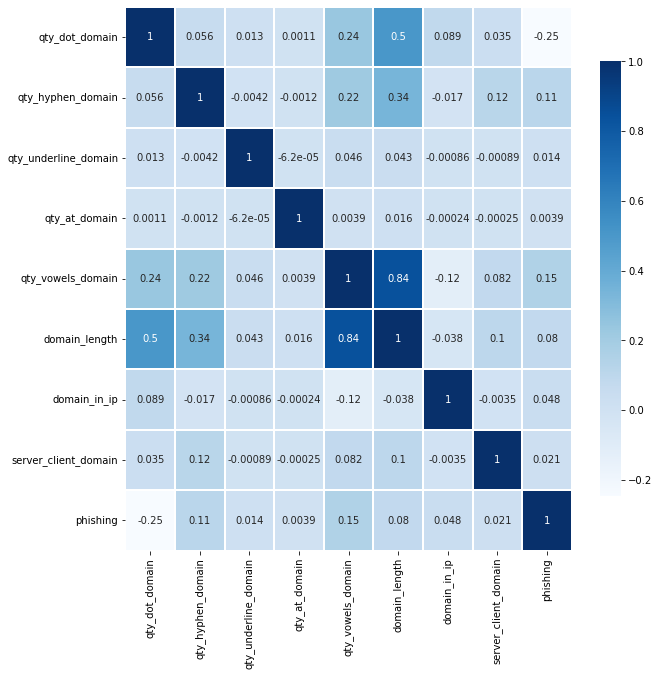

In [32]:
# Heatmap for Dataset attributes based on domain URL.
plt.figure(figsize=(10,10))
sns.heatmap(df_knn[domain_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()

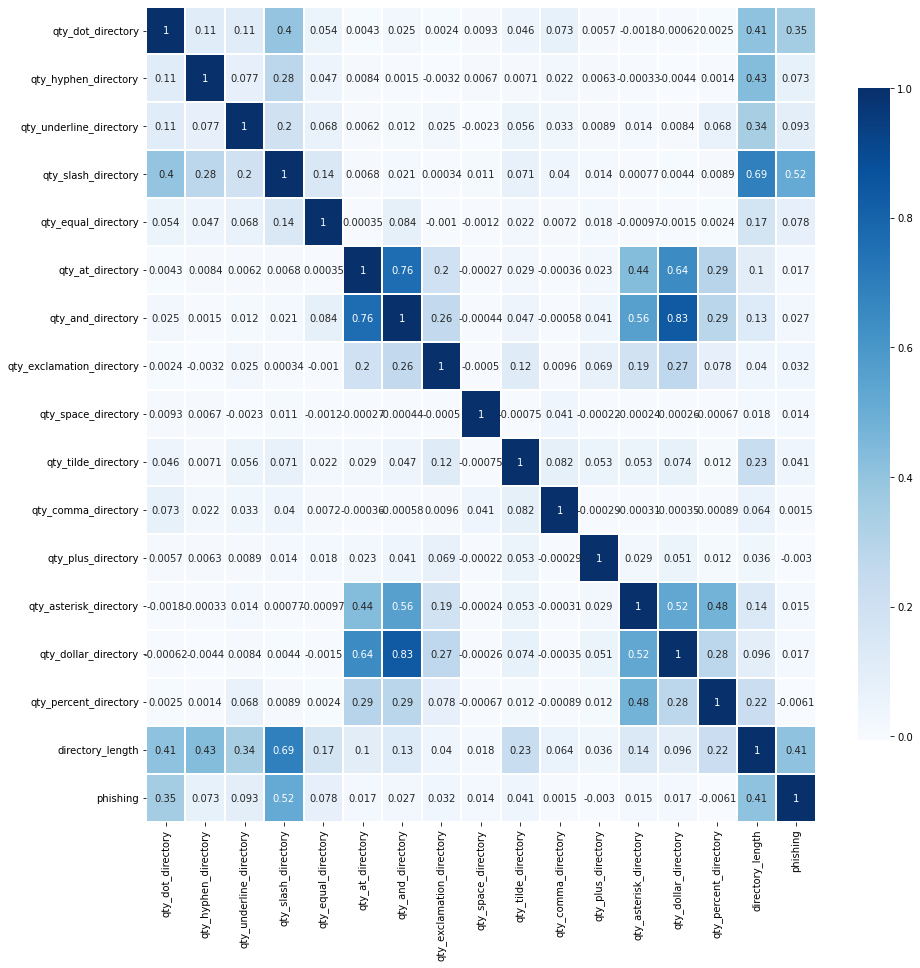

In [33]:
# Heatmap for Dataset attributes based on URL directory.
plt.figure(figsize=(15,15))
sns.heatmap(df_knn[dir_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()

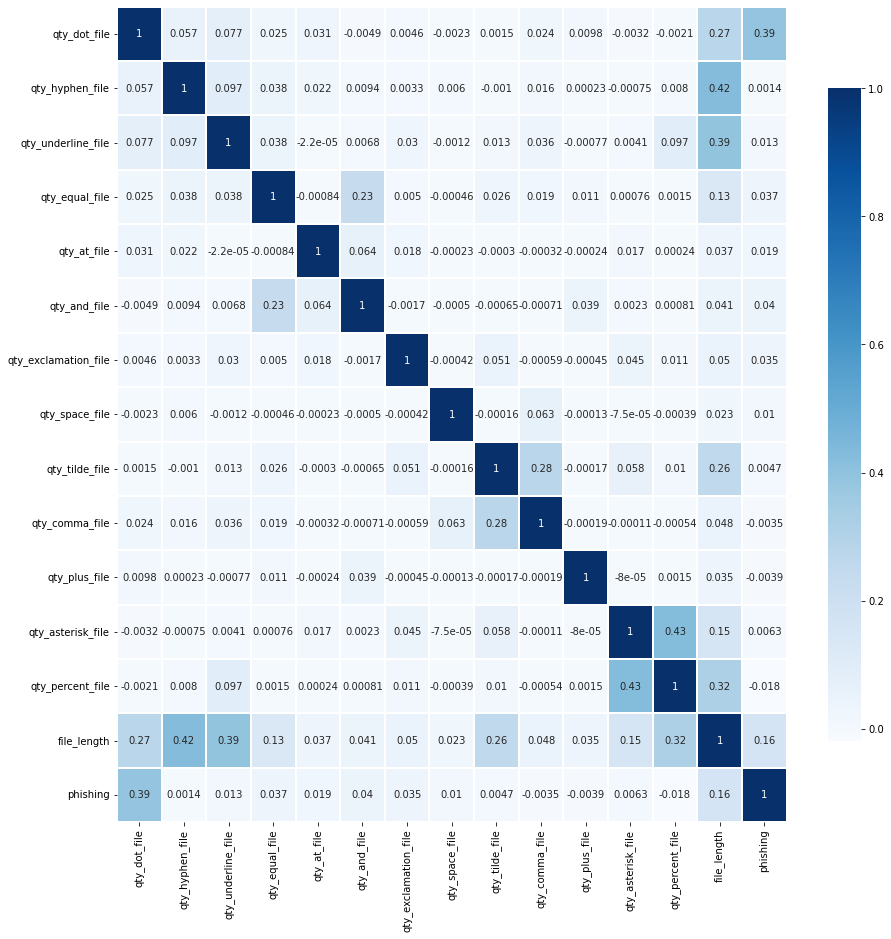

In [34]:
# Heatmap for Dataset attributes based on URL file name. 
plt.figure(figsize=(15,15))
sns.heatmap(df_knn[file_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()

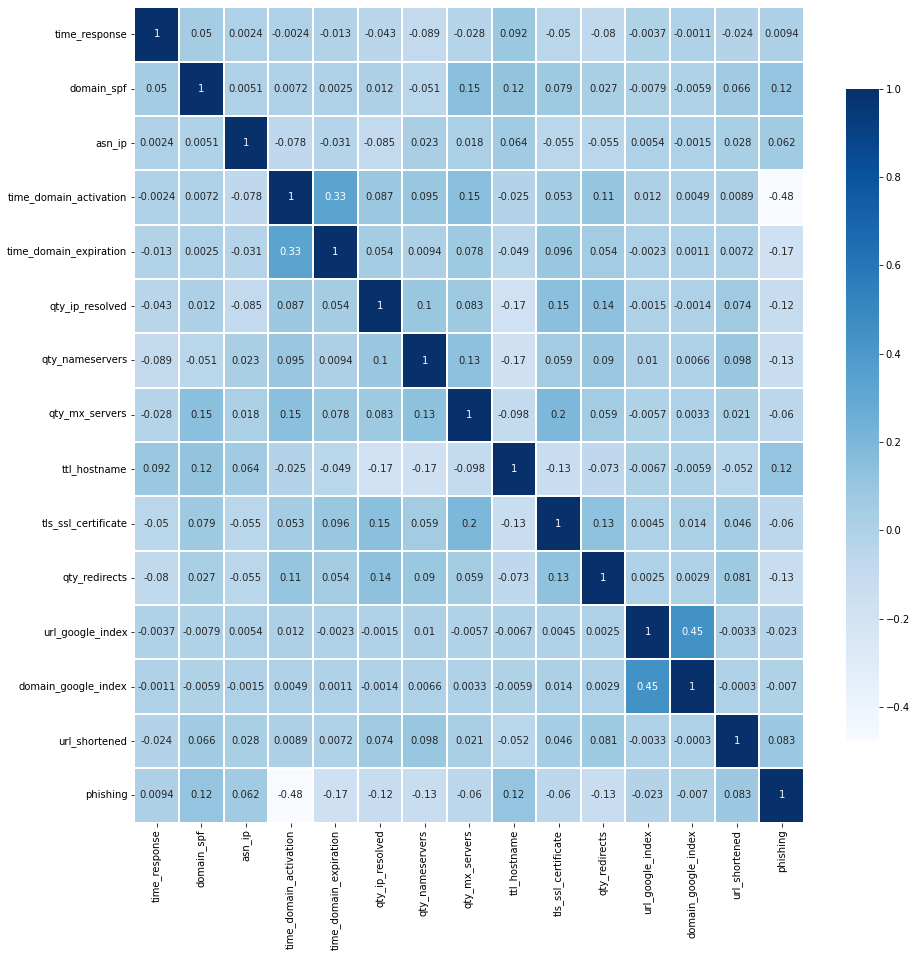

In [35]:
# Heatmap for Dataset attributes based on URL parameters & Dataset attributes based on resolving URL and external services. 
plt.figure(figsize=(15,15))
sns.heatmap(df_knn[external_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()

In [8]:
#data normalization

X = df_knn.drop('phishing', axis=1)
y = df_knn['phishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

ss = StandardScaler()
X_train[numerical_cols] = ss.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = ss.transform(X_test[numerical_cols])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43053, 72)
(14352, 72)
(43053,)
(14352,)


## Feature selection & importance

In [14]:
def print_metrics(model,y_pred):
    print("Training accuracy:",accuracy_score(y_train,model.predict(X_train)))
    print("test accuracy:",accuracy_score(y_test, y_pred))
    print("precision score:",precision_score(y_test, y_pred))
    print("recall:",recall_score(y_test, y_pred))
    print("f1 score:",f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    plt.show()

Training accuracy: 0.8889508280491487
test accuracy: 0.8862876254180602
precision score: 0.8870946906084485
recall: 0.9005901639344263
f1 score: 0.8937914877001171
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      6727
         1.0       0.89      0.90      0.89      7625

    accuracy                           0.89     14352
   macro avg       0.89      0.89      0.89     14352
weighted avg       0.89      0.89      0.89     14352



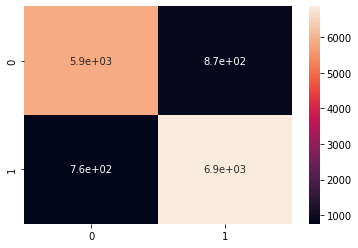

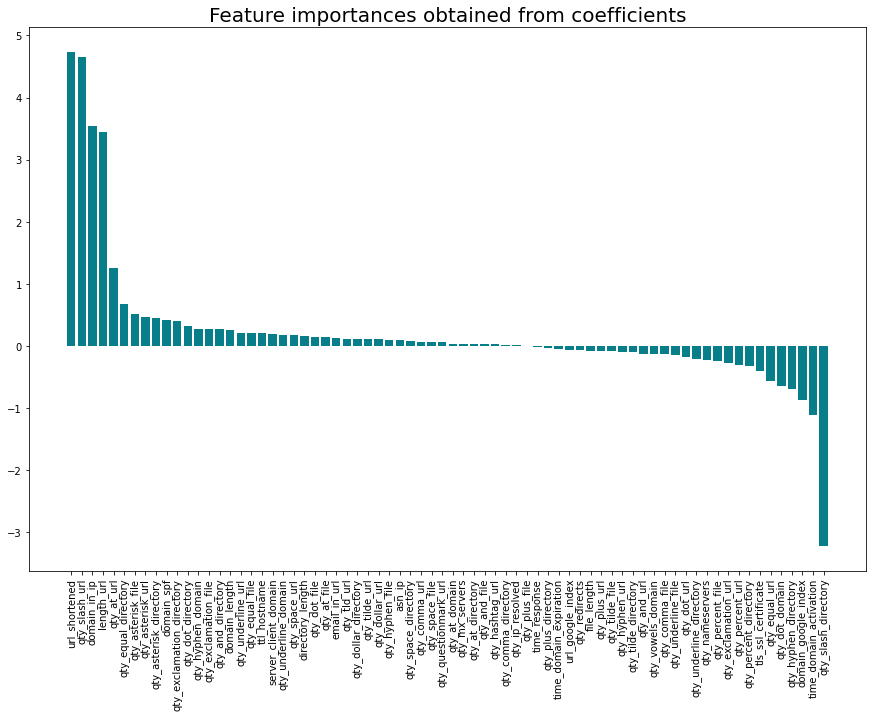

In [15]:
#Feature importance with LogisticRegression
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr=model_lr.predict(X_test)
print_metrics(model_lr,y_pred_lr)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_lr.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(15,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

[12:28:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy: 0.9733119643230437
test accuracy: 0.9494147157190636
precision score: 0.9538218655440074
recall: 0.9508196721311475
f1 score: 0.9523184027321686
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      6727
         1.0       0.95      0.95      0.95      7625

    accuracy                           0.95     14352
   macro avg       0.95      0.95      0.95     14352
weighted avg       0.95      0.95      0.95     14352



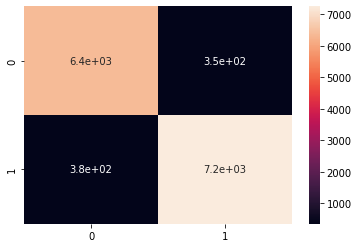

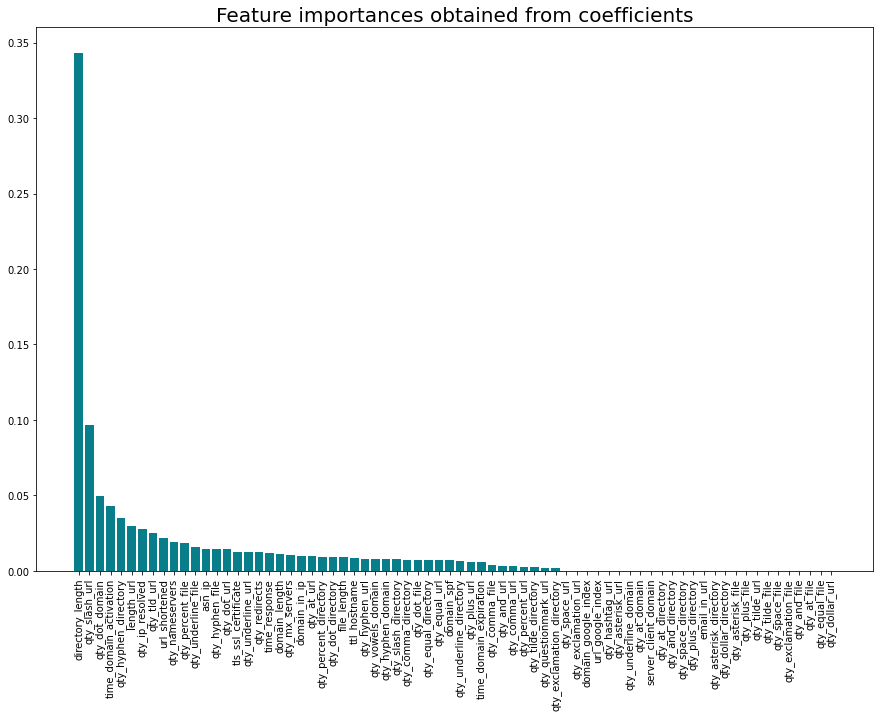

In [17]:
#Feature importance with XGBoost
from xgboost import XGBClassifier

model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)

y_pred_xg=model_xg.predict(X_test)
print_metrics(model_xg,y_pred_xg)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_xg.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Training accuracy: 0.9999767728149026
test accuracy: 0.9509476031215162
precision score: 0.9522938178015946
recall: 0.9555409836065574
f1 score: 0.9539146373396177
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      6727
         1.0       0.95      0.96      0.95      7625

    accuracy                           0.95     14352
   macro avg       0.95      0.95      0.95     14352
weighted avg       0.95      0.95      0.95     14352



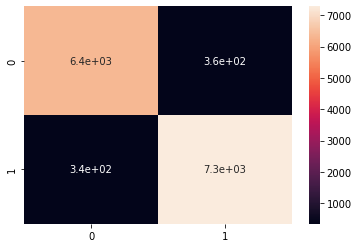

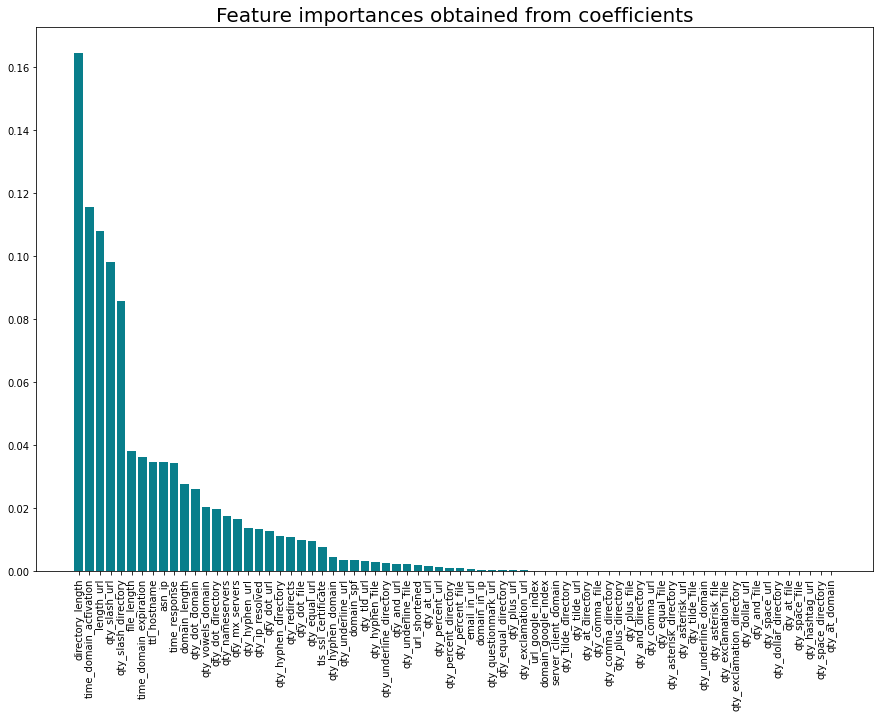

In [18]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf=model_rf.predict(X_test)
print_metrics(model_rf,y_pred_rf)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_rf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15,10))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
#you don’t want highly correlated features in your dataset because they provide the same information 

correlated_features = set()
correlation_matrix = df_knn.drop('phishing', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("most correlated features are :",correlated_features)

most correlated features are : {'qty_slash_directory', 'qty_space_directory', 'qty_asterisk_directory', 'qty_dollar_directory', 'qty_at_directory', 'qty_percent_directory', 'qty_and_url', 'qty_plus_directory', 'domain_length', 'qty_percent_file', 'qty_comma_file', 'qty_tilde_directory', 'qty_plus_file', 'qty_hyphen_directory'}


In [27]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

Optimal number of features: 65


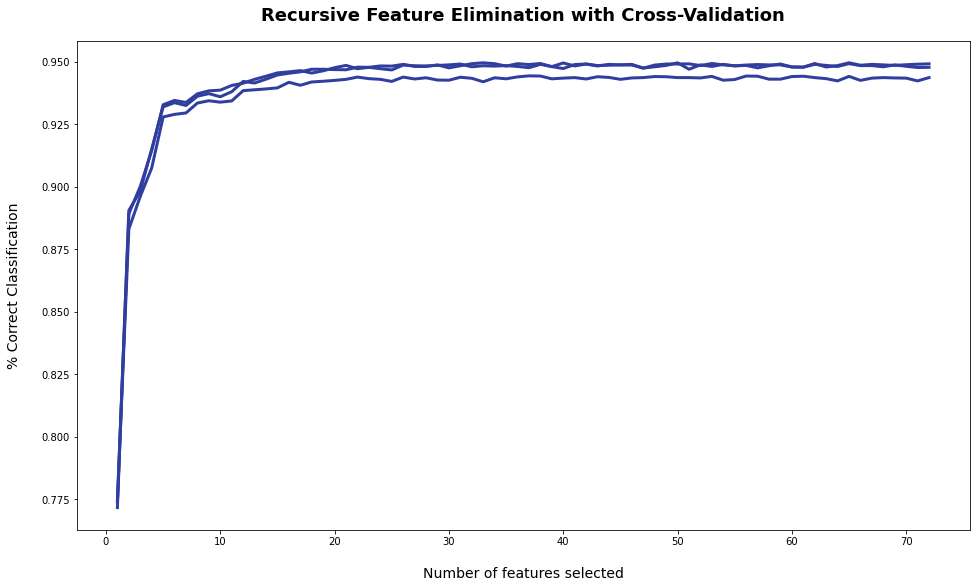

In [28]:
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='accuracy',n_jobs=-1)
rfecv.fit(X_train, y_train)

print('Optimal number of features: {}'.format(rfecv.n_features_))


plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [32]:
print('Best features :', X_train.columns[rfecv.support_])
print('Original features :', X_train.columns)

Best features : Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url',
       'qty_asterisk_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url',
       'length_url', 'qty_dot_domain', 'qty_hyphen_domain',
       'qty_underline_domain', 'qty_vowels_domain', 'domain_length',
       'domain_in_ip', 'server_client_domain', 'qty_dot_directory',
       'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_tilde_directory',
       'qty_comma_directory', 'qty_plus_directory', 'qty_asterisk_directory',
       'qty_percent_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file', 'qty_underline_file', 'qty_equal_file',
       'qty_and_file', 'qty_exclamation_file', 'qt

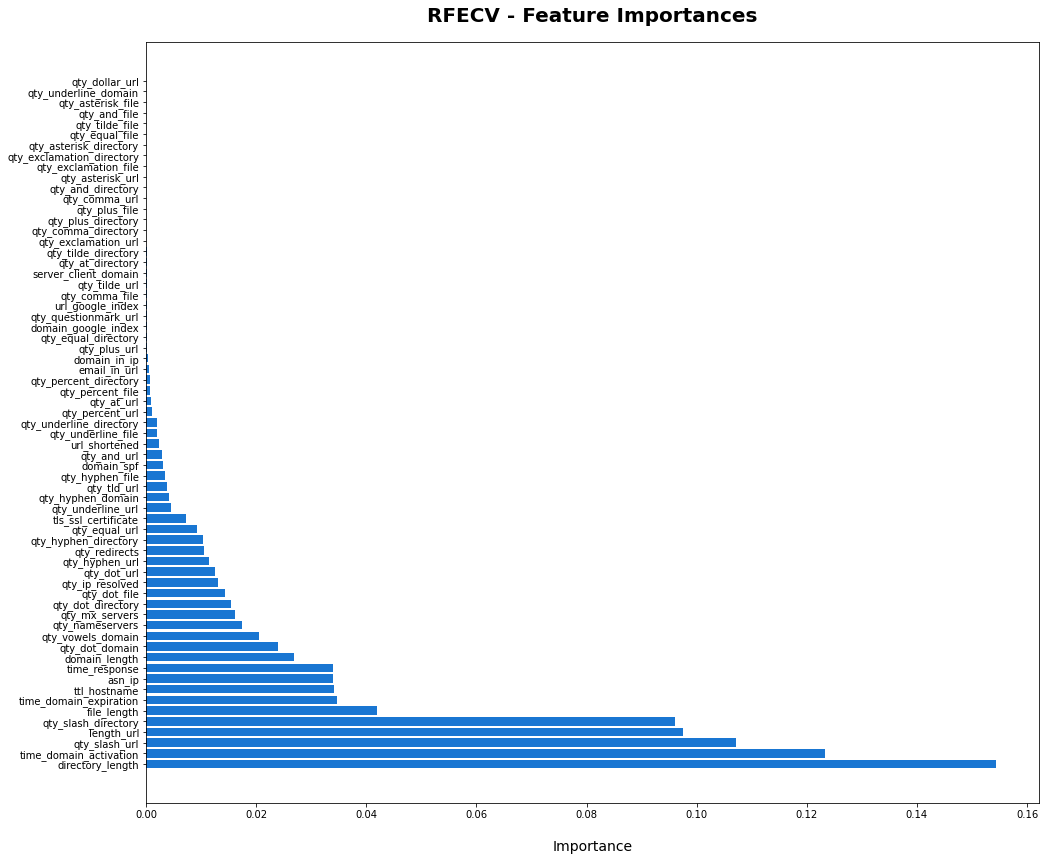

In [33]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
# Exhaustive feature selection
# This is a brute-force evaluation of each feature subset. 
# This means that it tries every possible combination of the variables and returns the best performing subset.

from mlxtend.feature_selection import ExhaustiveFeatureSelector

efs=ExhaustiveFeatureSelector(RandomForestClassifier(),min_features=10,max_features=30,scoring='roc_auc',cv=StratifiedKFold(3),n_jobs=-1)
efs=efs.fit(X_train,y_train)

#print selected features
selected_features=X_train.columns[list(efs.best_idx_)]
print(selected_features)

#print final prediction score
print(efs.best_score_)

In [36]:
def Outliers(numerical_cols,drop=False):
    for each_feature in df_knn.columns:
        feature_data=df_knn[each_feature]
        Q1= np.percentile(feature_data,.25)
        Q3= np.percentile(feature_data,.75)
        IQR =Q3-Q1 #Interquartile Range
        outlier_step=IQR * 1.5
        outliers=feature_data[~((feature_data >= Q1-outlier_step)&(feature_data<=Q3+outlier_step))].index.tolist()
        print('For the feature {}, No of outliers is {}'.format(each_feature,len(outliers)))
Outliers(df_knn,drop=False)

For the feature qty_dot_url, No of outliers is 44763
For the feature qty_hyphen_url, No of outliers is 13405
For the feature qty_underline_url, No of outliers is 5270
For the feature qty_slash_url, No of outliers is 40886
For the feature qty_questionmark_url, No of outliers is 714
For the feature qty_equal_url, No of outliers is 7207
For the feature qty_at_url, No of outliers is 1700
For the feature qty_and_url, No of outliers is 3746
For the feature qty_exclamation_url, No of outliers is 193
For the feature qty_space_url, No of outliers is 34
For the feature qty_tilde_url, No of outliers is 217
For the feature qty_comma_url, No of outliers is 82
For the feature qty_plus_url, No of outliers is 126
For the feature qty_asterisk_url, No of outliers is 59
For the feature qty_hashtag_url, No of outliers is 11
For the feature qty_dollar_url, No of outliers is 54
For the feature qty_percent_url, No of outliers is 1498
For the feature qty_tld_url, No of outliers is 411
For the feature length_u

boxplot for feature qty_dot_url


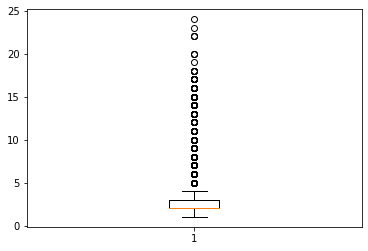

boxplot for feature qty_hyphen_url


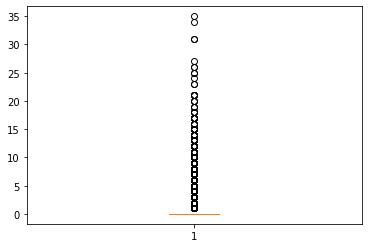

boxplot for feature qty_underline_url


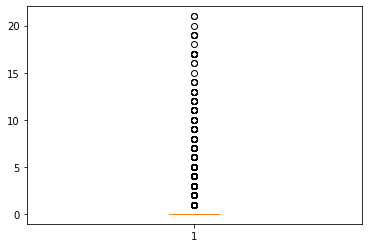

boxplot for feature qty_slash_url


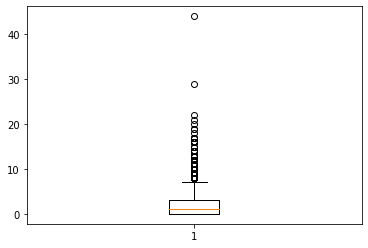

boxplot for feature qty_questionmark_url


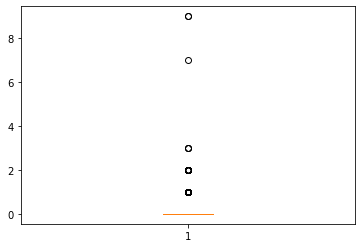

boxplot for feature qty_equal_url


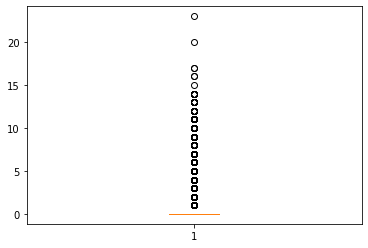

boxplot for feature qty_at_url


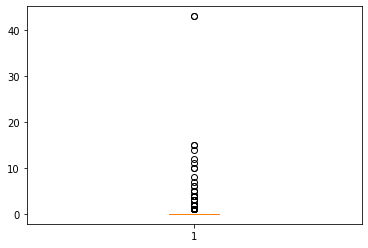

boxplot for feature qty_and_url


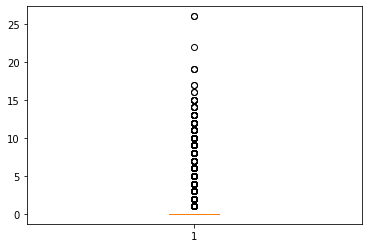

boxplot for feature qty_exclamation_url


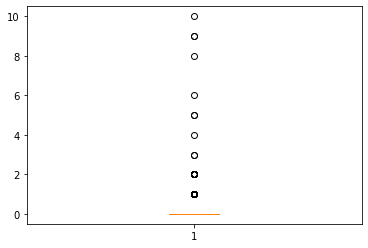

boxplot for feature qty_space_url


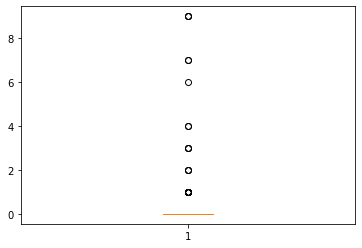

boxplot for feature qty_tilde_url


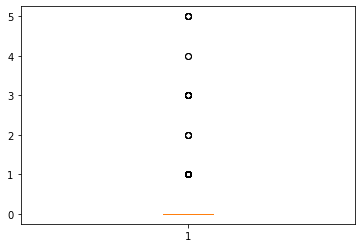

boxplot for feature qty_comma_url


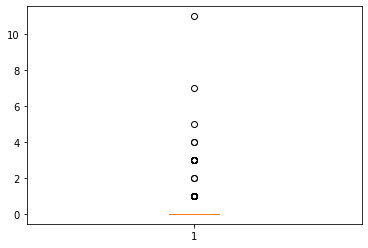

boxplot for feature qty_plus_url


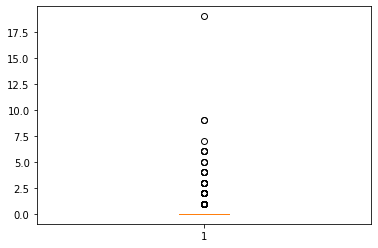

boxplot for feature qty_asterisk_url


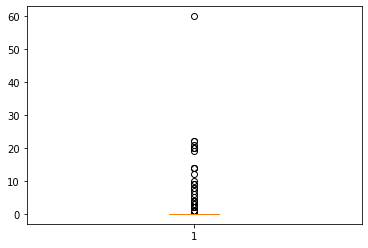

boxplot for feature qty_hashtag_url


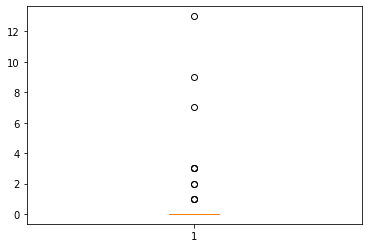

boxplot for feature qty_dollar_url


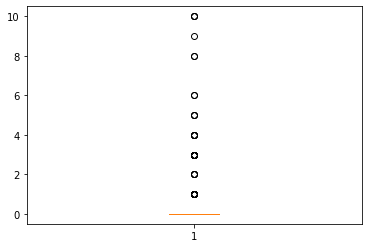

boxplot for feature qty_percent_url


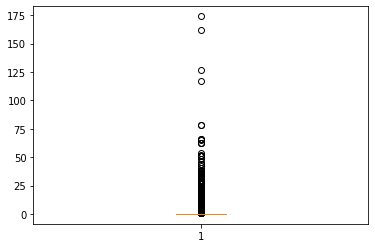

boxplot for feature qty_tld_url


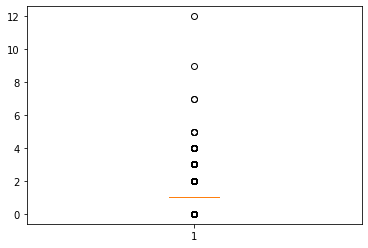

boxplot for feature length_url


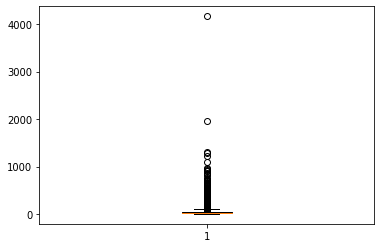

boxplot for feature qty_dot_domain


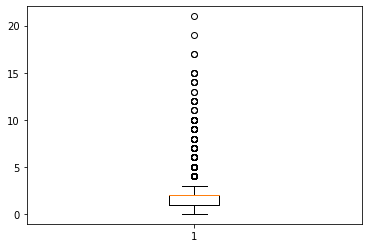

boxplot for feature qty_hyphen_domain


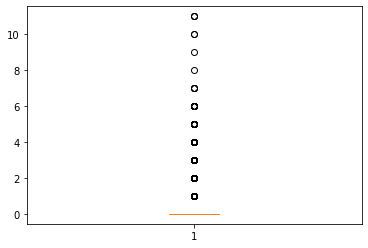

boxplot for feature qty_underline_domain


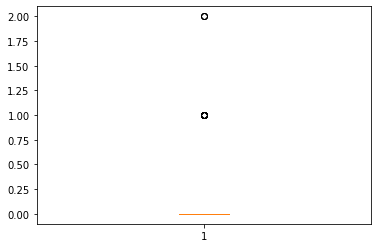

boxplot for feature qty_vowels_domain


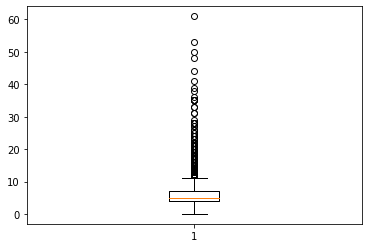

boxplot for feature domain_length


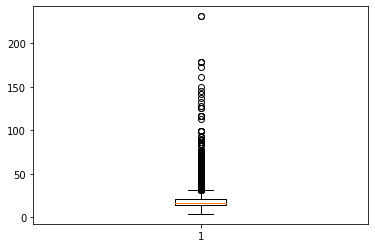

boxplot for feature qty_dot_directory


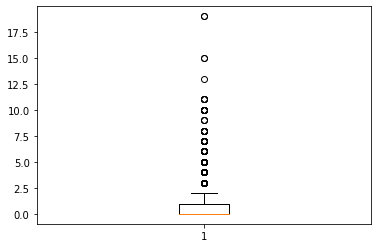

boxplot for feature qty_hyphen_directory


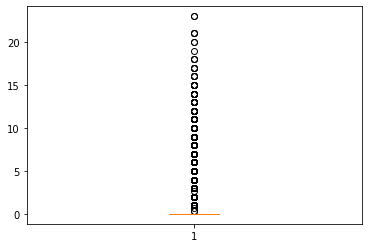

boxplot for feature qty_underline_directory


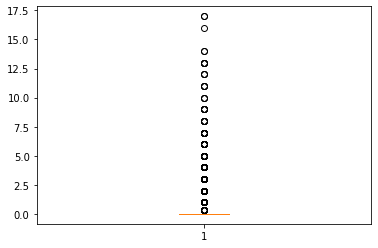

boxplot for feature qty_slash_directory


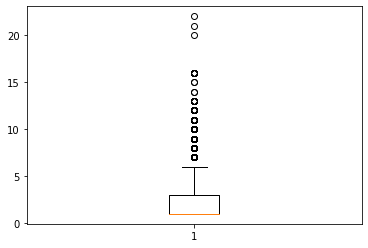

boxplot for feature qty_equal_directory


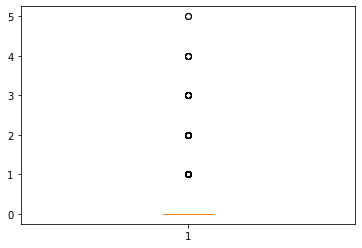

boxplot for feature qty_at_directory


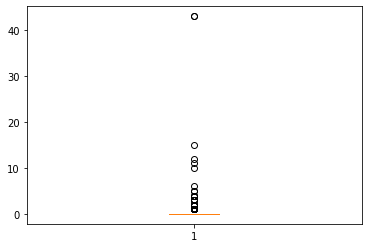

boxplot for feature qty_and_directory


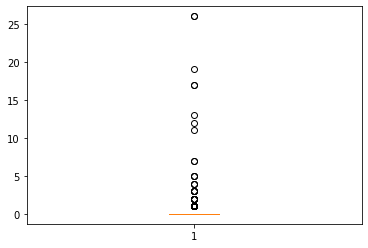

boxplot for feature qty_exclamation_directory


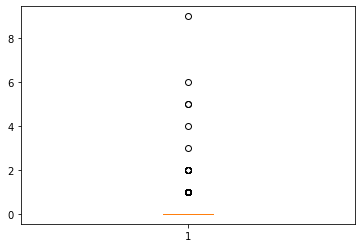

boxplot for feature qty_space_directory


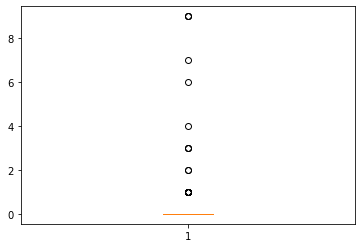

boxplot for feature qty_tilde_directory


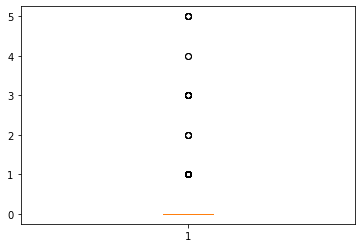

boxplot for feature qty_comma_directory


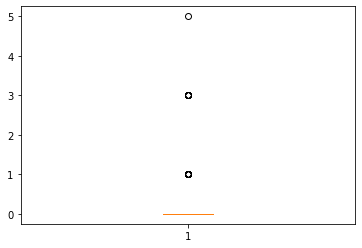

boxplot for feature qty_plus_directory


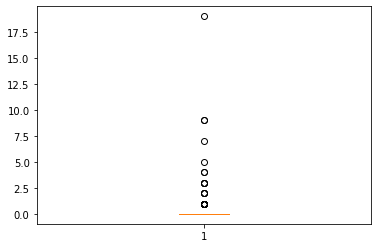

boxplot for feature qty_asterisk_directory


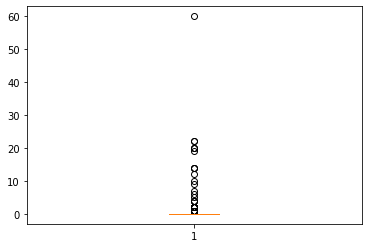

boxplot for feature qty_dollar_directory


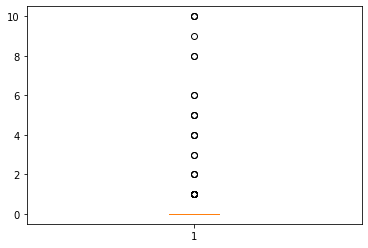

boxplot for feature qty_percent_directory


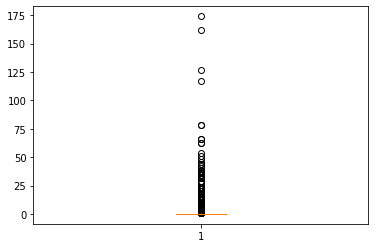

boxplot for feature directory_length


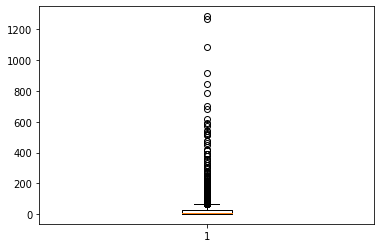

boxplot for feature qty_dot_file


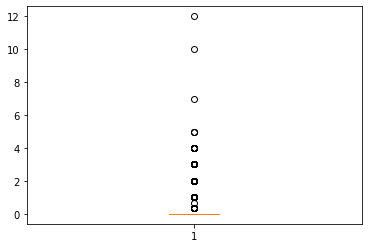

boxplot for feature qty_hyphen_file


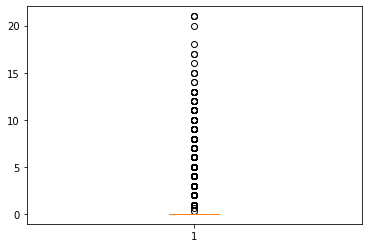

boxplot for feature qty_underline_file


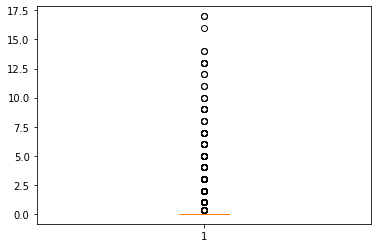

boxplot for feature qty_equal_file


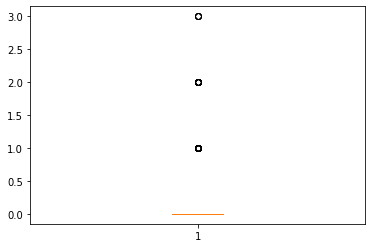

boxplot for feature qty_at_file


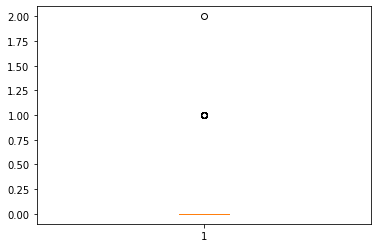

boxplot for feature qty_and_file


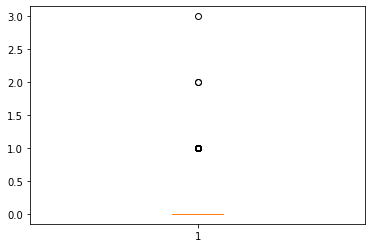

boxplot for feature qty_exclamation_file


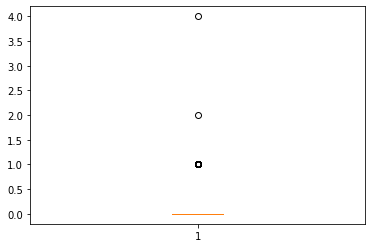

boxplot for feature qty_space_file


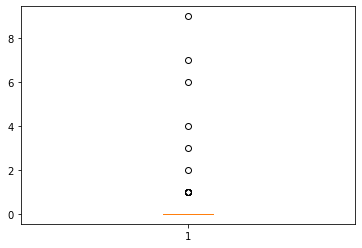

boxplot for feature qty_tilde_file


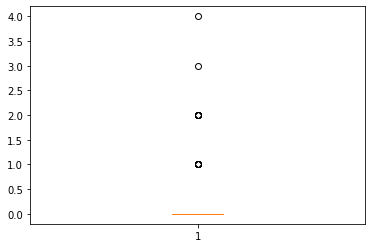

boxplot for feature qty_comma_file


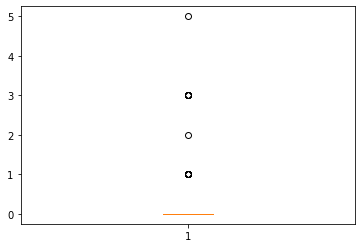

boxplot for feature qty_plus_file


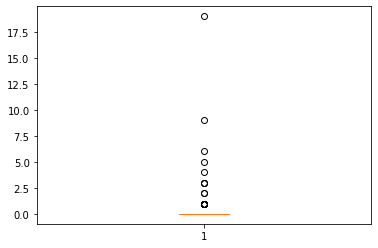

boxplot for feature qty_asterisk_file


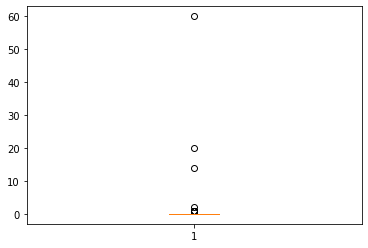

boxplot for feature qty_percent_file


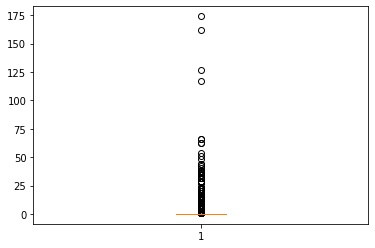

boxplot for feature file_length


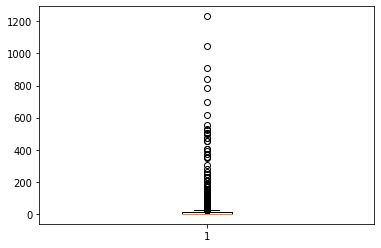

boxplot for feature time_response


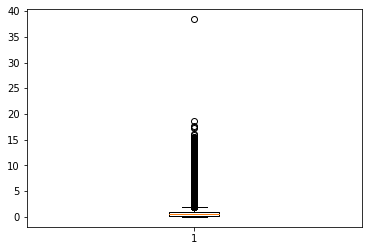

boxplot for feature asn_ip


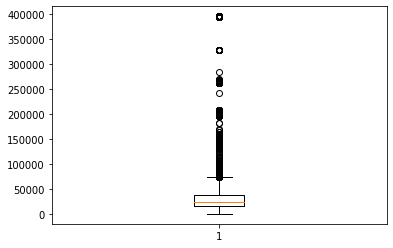

boxplot for feature time_domain_activation


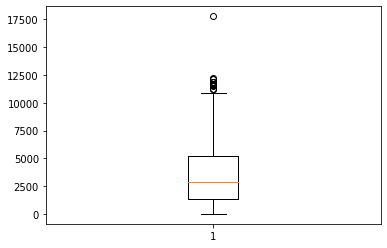

boxplot for feature time_domain_expiration


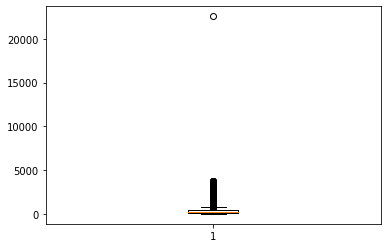

boxplot for feature qty_ip_resolved


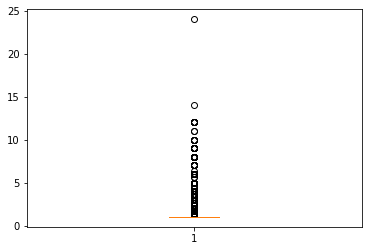

boxplot for feature qty_nameservers


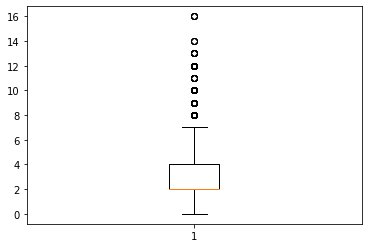

boxplot for feature qty_mx_servers


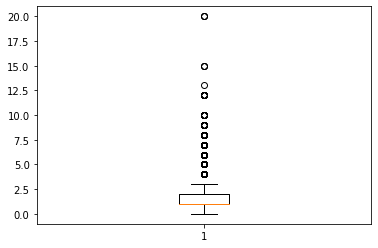

boxplot for feature ttl_hostname


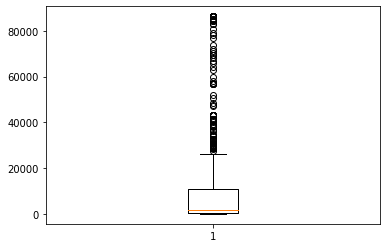

boxplot for feature qty_redirects


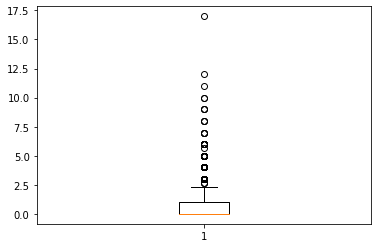

boxplot for feature qty_at_domain


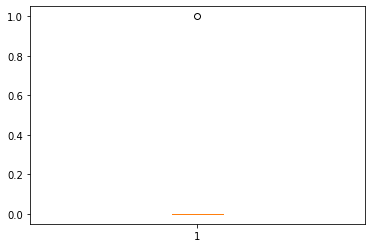

In [38]:
for i in numerical_cols:
    print(f'boxplot for feature {i}')
    plt.figure()
    plt.boxplot(df_knn[i])
    plt.show()

In [ ]:
#Models to train on NB, Random Forest, SVM, Logistic Regression, XGBoost, Decision Trees

In [ ]:
#Hyperparameter tuning using GridsearchCV or RandomSearchCV